# Predictive Modeling for Heart Disease: Biking vs Smoking

In [47]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [28]:
h = pd.read_csv('heart.csv')

# 1

In [29]:
h.head(5)

,SN,biking,smoking,heartdisease
0,1,30.801246,10.896608,11.769423
1,2,65.129215,2.219563,2.854081
2,3,1.959665,17.588331,17.177803
3,4,44.800196,2.802559,6.816647
4,5,69.428454,15.974505,4.062224


#  2. Separate the predictors making biking X predictor and smoking as X predictor 

In [60]:


X = h['biking']

X_1 = h['smoking']

X_t = h[['biking', 'smoking']]

y = h['heartdisease']

In [31]:
y.head()

0    11.769423
1     2.854081
2    17.177803
3     6.816647
4     4.062224
Name: heartdisease, dtype: float64

In [32]:
X.head()

0    30.801246
1    65.129215
2     1.959665
3    44.800196
4    69.428454
Name: biking, dtype: float64

In [33]:
X_1.head()

0    10.896608
1     2.219563
2    17.588331
3     2.802559
4    15.974505
Name: smoking, dtype: float64

In [61]:
X_t.shape

(498, 2)

# 3

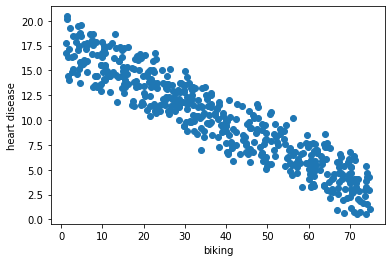

In [43]:
# Scatter Plot for X 
plt.scatter(X, y, cmap="jet")
plt.xlabel('biking')
plt.ylabel('heart disease')
plt.show()

From the Scatter plot of we can conclude that people who bike will suffer less from heart disease problems.

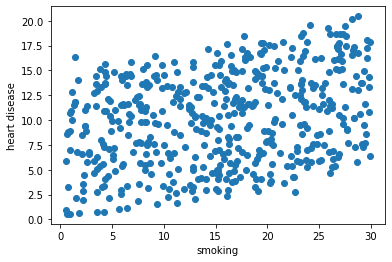

In [37]:
# Scatter Plot for X_1
plt.scatter(X_1, y, cmap='jet')
plt.xlabel('smoking')
plt.ylabel('heart disease')
plt.show()

From the Scatter plot above we see that there is some correlation between the smoking and heart disease. Showing that the more you smoke the I higher chances of heart disease.

# 4

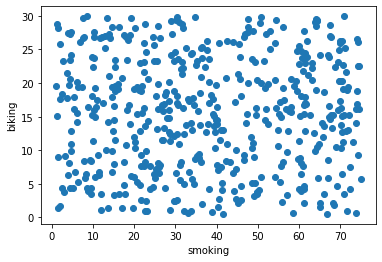

In [45]:
# Scatter Plot for X & X_1 
plt.scatter(X, X_1, cmap='jet')
plt.xlabel('smoking')
plt.ylabel('biking')
plt.show()

From the above visual we see that there is not any correlation that can be gather from using biking and smoking (the predictors) for insight into the data.

# 5

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X_t, y, test_size=0.3, random_state=0) 

The reasoning behind having the test size at 30% is to be able to validate true. Data splitting is typically done to avoid overfitting. That is an instance where a machine learning model fits its training data too well and fails to reliably fit additional data by splitting the data by 30% we allow some marginal error space in case the data has no correlation. When comparing machine learning algorithms, it is required   that they are fit and evaluated on the same subsets of the dataset.

# 6

In [68]:
# Linear Regression Model 
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [69]:
print(regressor.intercept_)

15.05861065444218


In [70]:
print(regressor.coef_)

[-0.20082344  0.17457694]


# 8

In [80]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
import numpy as np
def run_experiment(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print("R^2 : ", r2_score(y_test, y_pred))
    mae = mean_absolute_error(y_test,y_pred)
    print("MAE :", mean_absolute_error(y_test,y_pred))
    mea_sqrt = np.sqrt(mean_squared_error(y_test, y_pred))
    print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred)))
    return [r2, mae, mea_sqrt]
    
model = LinearRegression()
values = run_experiment(model)

R^2 :  0.9785466350105418
MAE : 0.5457415156909675
RMSE: 0.6768041599256646


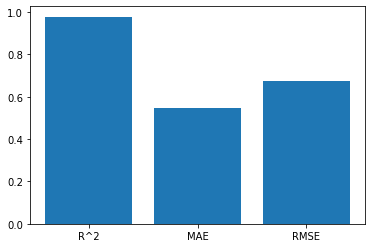

In [96]:
labels_1 = ['R^2', 'MAE', 'RMSE']
x = np.arange(len(labels))  # the label locations

fig, ax = plt.subplots()
rects1 = ax.bar(x, values)
ax.set_xticks(x)
ax.set_xticklabels(labels_1)
plt.show()

# 9 

The metrics are telling us that each designate a scorer/metrics  object with the scoring parameter; the table below shows all possible values. All scorer objects follow the convention that higher return values are better than lower return values. Thus metrics which measure the distance between the model and the data. Because we returned a high r^2 value we are able to establish that are data is reliable with high accuaracy.

In [104]:
# 10 
data_table = {'biking': [3.99, 19.11, 44.43, 55.13, 34.22],
        'Smoking': [13.00, 15.17, 19.66, 7.05,15.05]}

data = pd.DataFrame(data_table)
model.predict(data)

array([16.52682527, 13.86920673,  9.56820755,  5.21798153, 10.81381525])

From the results we are able to see that the likelihood of Person 1: 16.52 % because his smoking percentage was higher than his biking percntage. Person 2: 13.86 % has a slightly a lower pecentage of getting heart disease due to the fact the he bikes 4 % more than he smokes . Person 3: 9.56 % because his smoking percentage was higher than his biking percntage. Person 4: 5.21 % chance of obtaining heart disease, because his biking percentage was higher than his smoking percntage. Person 5: 10.81 % because his smoking percentage was higher than his biking percntage. Person 5 bikes double the amount he smokes which plays a major role in a lower chance of potential obtaining heart disease.  
